In this notebook we will use the nn class **Sequential** to model a CNN

We will use the single target network

# Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *
from networks import *

from utilities import *
from parse_dataset import *

In [2]:
# %load_ext autoreload
# %autoreload 2

# Loading the dataset

In [3]:
folder=Dataset(base_directory='/home/stefano/',dataset='eeg')

Reading data from /home/stefano/EEG//
Reading data from /home/stefano/EEG//stored//
Reading data from /home/stefano/EEG//__pycache__//
Reading data from /home/stefano/EEG//data//
Reading data from /home/stefano/EEG//stefano//
Reading data from /home/stefano/EEG//stefano//__pycache__//
Reading data from /home/stefano/EEG//stefano//notebook//


In [4]:
# train_dataset,train_target=load_script.load_dataset_1000hz(train=True)

In [5]:
# test_dataset,test_target=load_script.load_dataset_1000hz(train=False)

In [6]:
train_dataset,train_target=load_script.load_dataset(train=True)

In [7]:
test_dataset,test_target=load_script.load_dataset(train=False)

# Normalization

In [8]:
train_dataset.shape

torch.Size([316, 28, 50])

In [9]:
test_dataset.shape

torch.Size([100, 28, 50])

In [10]:
mean=train_dataset.mean(0).mean(1).view(1,28,1)
std=train_dataset.std(2).mean(0).view(1,28,1)

In [11]:
train_dataset=(train_dataset-mean)/std
test_dataset=(test_dataset-mean)/std

# Defining the network

### Simple Network

# Training

Dropout 0


/home/stefano/anaconda3/lib/python3.6/site-packages/torch/cuda/__init__.py:97: UserWarning: 
    Found GPU0 GeForce GTX 960M which is of cuda capability 5.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))
  0%|          | 0/300 [00:00<?, ?it/s]

DoubleCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0)
    (8): Flatten(
    )
    (9): Linear(in_features=1288, out_features=200, bias=True)
    (10): ReLU()
    (11): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:03<00:00, 83.79it/s]


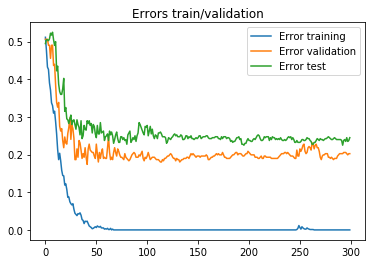

  4%|▎         | 11/300 [00:00<00:02, 101.34it/s]

Performance train: 0.000815752461322
Performance validation: 0.202953586498
Performance test: 0.239466666667
Dropout 0.1
DoubleCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0.1)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0.1)
    (8): Flatten(
    )
    (9): Linear(in_features=1288, out_features=200, bias=True)
    (10): ReLU()
    (11): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:03<00:00, 83.34it/s]


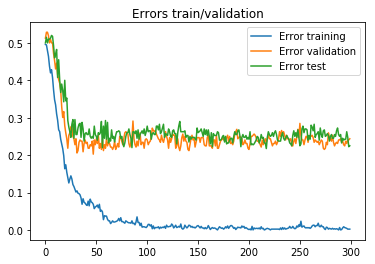

  4%|▎         | 11/300 [00:00<00:02, 105.14it/s]

Performance train: 0.00590717299578
Performance validation: 0.240801687764
Performance test: 0.251733333333
Dropout 0.2
DoubleCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0.2)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0.2)
    (8): Flatten(
    )
    (9): Linear(in_features=1288, out_features=200, bias=True)
    (10): ReLU()
    (11): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:03<00:00, 84.71it/s]


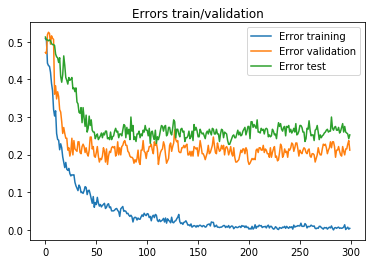

  4%|▎         | 11/300 [00:00<00:02, 109.42it/s]

Performance train: 0.00699015471167
Performance validation: 0.210843881857
Performance test: 0.263466666667
Dropout 0.3
DoubleCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0.3)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0.3)
    (8): Flatten(
    )
    (9): Linear(in_features=1288, out_features=200, bias=True)
    (10): ReLU()
    (11): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:03<00:00, 82.80it/s]


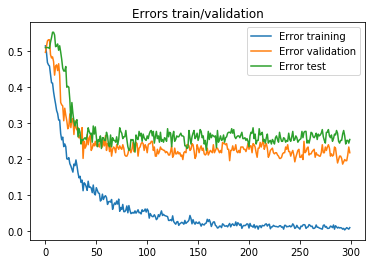

  4%|▎         | 11/300 [00:00<00:02, 109.47it/s]

Performance train: 0.012264416315
Performance validation: 0.215949367089
Performance test: 0.2609
Dropout 0.4
DoubleCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0.4)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0.4)
    (8): Flatten(
    )
    (9): Linear(in_features=1288, out_features=200, bias=True)
    (10): ReLU()
    (11): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:03<00:00, 83.17it/s]


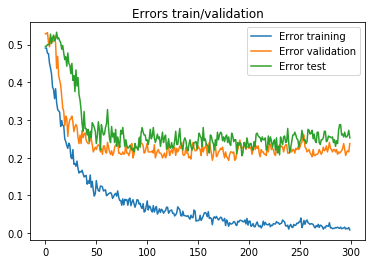

  4%|▍         | 12/300 [00:00<00:02, 110.79it/s]

Performance train: 0.0203094233474
Performance validation: 0.221308016878
Performance test: 0.251366666667
Dropout 0.5
DoubleCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0.5)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0.5)
    (8): Flatten(
    )
    (9): Linear(in_features=1288, out_features=200, bias=True)
    (10): ReLU()
    (11): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:03<00:00, 82.41it/s]


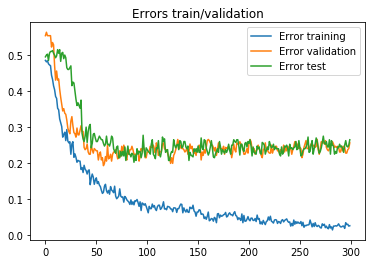

  4%|▎         | 11/300 [00:00<00:02, 103.38it/s]

Performance train: 0.0302812939522
Performance validation: 0.243375527426
Performance test: 0.243966666667
Dropout 0.6
DoubleCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0.6)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0.6)
    (8): Flatten(
    )
    (9): Linear(in_features=1288, out_features=200, bias=True)
    (10): ReLU()
    (11): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:04<00:00, 65.32it/s]


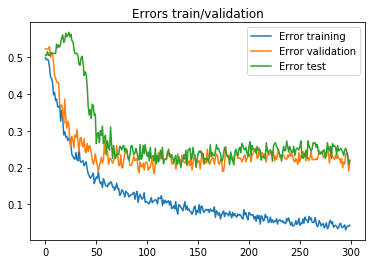

  3%|▎         | 8/300 [00:00<00:04, 72.45it/s]

Performance train: 0.0487904360056
Performance validation: 0.228101265823
Performance test: 0.2473
Dropout 0.7
DoubleCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0.7)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0.7)
    (8): Flatten(
    )
    (9): Linear(in_features=1288, out_features=200, bias=True)
    (10): ReLU()
    (11): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:03<00:00, 80.72it/s]


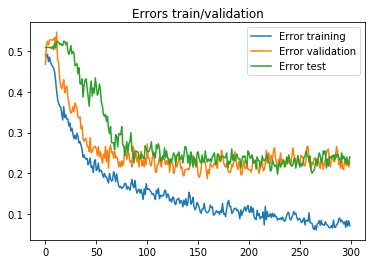

  3%|▎         | 10/300 [00:00<00:02, 99.69it/s]

Performance train: 0.0814345991561
Performance validation: 0.231434599156
Performance test: 0.2303
Dropout 0.8
DoubleCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0.8)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0.8)
    (8): Flatten(
    )
    (9): Linear(in_features=1288, out_features=200, bias=True)
    (10): ReLU()
    (11): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:03<00:00, 82.35it/s]


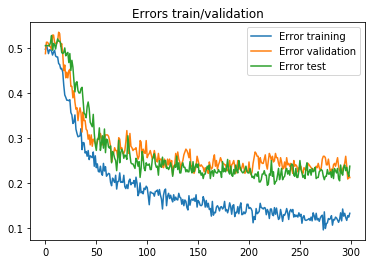

  3%|▎         | 9/300 [00:00<00:03, 87.33it/s]

Performance train: 0.124894514768
Performance validation: 0.237890295359
Performance test: 0.2228
Dropout 0.9
DoubleCNNLayers(
  (sequential): Sequential(
    (0): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU()
    (3): Dropout(p=0.9)
    (4): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
    (5): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True)
    (6): ReLU()
    (7): Dropout(p=0.9)
    (8): Flatten(
    )
    (9): Linear(in_features=1288, out_features=200, bias=True)
    (10): ReLU()
    (11): Linear(in_features=200, out_features=2, bias=True)
  )
)
Repetition 0


100%|██████████| 300/300 [00:03<00:00, 83.03it/s]


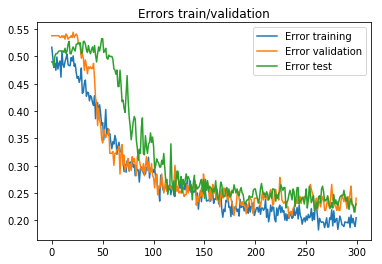

Performance train: 0.203741209564
Performance validation: 0.234050632911
Performance test: 0.239633333333


In [12]:
dropout_values=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results=[]
for dropout in dropout_values:
    print('Dropout',dropout)
    cv=CrossValidation(k=4,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target,cuda=True)
    
    net_type=DoubleCNNLayers
    optimizer_type=optim.Adam
    criterion_type=nn.CrossEntropyLoss
    network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[3,3,3],
                                 linear_filters=[200,2],
                                 dropout_rate=dropout,batch_norm=True,conv1D=True)
    optimizer_params=OptimizerParams()
    train_params=TrainParams(max_epoch=300,mini_batch_size=79)


    params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
                  optimizer_params=optimizer_params,train_params=train_params,cuda=True)

    cv(params,repetitions=1,cross_validation=True,repetitions_test=4)
    results.append(cv.result)

In [ ]:
save=True
if save:
    file_name=folder.stored+'double_layers'
    write_pickle(results,file_name)

In [ ]:
cv=CrossValidation(k=2,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers2D
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[(3,1),(5,3),(3,3)],
                             linear_filters=[200,2],
                             dropout_rate=0,batch_norm=False,conv1D=False)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params)

In [ ]:
net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

train=Train(train_dataset=train_dataset,test_dataset=test_dataset,
            train_target=train_target,test_target=test_target)
train(params)